In [1]:
setwd("/projectbig/jupyternotebook/AG_Panzer/COVID/")

In [2]:
library(Seurat)
library(dplyr)
#library(tidyverse)
library(here)
#library(readxl)
#library(future)
#library(Matrix)
library(Signac)
library(ggplot2)
#library(sctransform)
library("xlsx")
library(future)
#plan("multiprocess", workers = 20)
options(future.globals.maxSize = 20 * 1000 * 1024^2)#20GB
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
RhpcBLASctl::blas_set_num_threads(1)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

here() starts at /projectbig/jupyternotebook/AG_Panzer/COVID


In [3]:
samples_ID="Sar01B_CD3pos"

In [4]:
seu<-readRDS(paste0("Prefiltering_objects/",samples_ID,"_filtered.rds"))
seu

An object of class Seurat 
16001 features across 11054 samples within 1 assay 
Active assay: RNA (16001 features)

In [5]:
seu <- NormalizeData(object = seu,
                     normalization.method = "LogNormalize",
                     scale.factor = 10000)

In [6]:
seu<-FindVariableFeatures(seu, 
        selection.method = "vst", nfeatures = 2000, verbose = FALSE)

In [7]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(seu), 10)
top10

[1] "TRBV12-4" "TRBV7-2"  "TRBV24-1" "TRBV4-2"  "TRBV4-1"  "TRBV13"  
 [7] "TUBA1B"   "GNLY"     "HIST1H4C" "TRBV7-3"

In [8]:
#DefaultAssay(object = seu) <- "RNA"
seu <- ScaleData(seu,features = rownames(seu))

Centering and scaling data matrix


In [9]:
seu <- RunPCA(object = seu, features = VariableFeatures(object = seu),
              verbose = F)

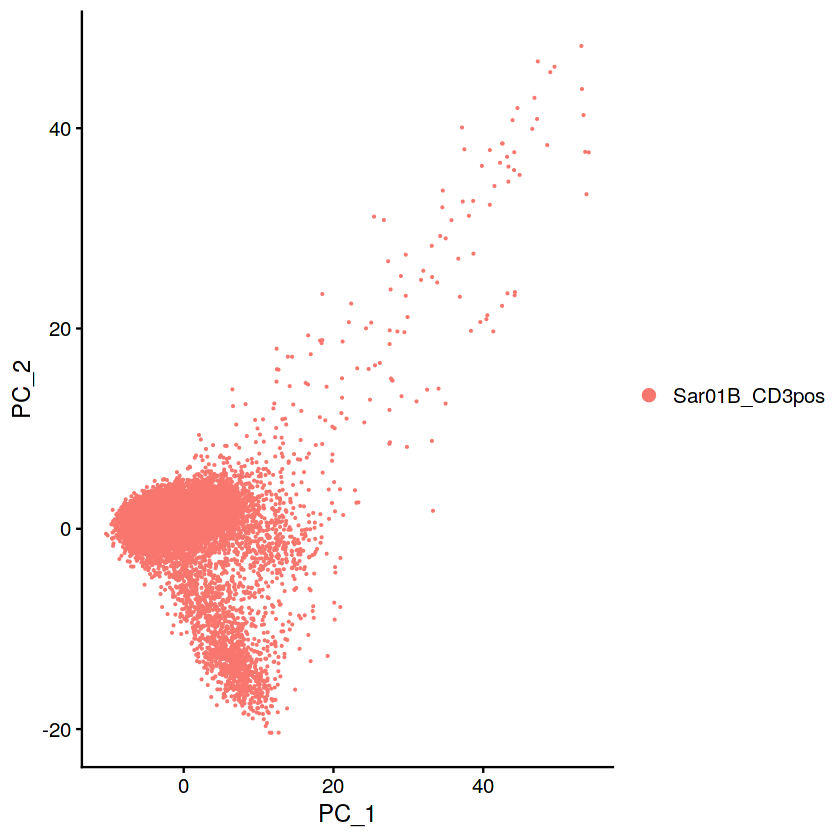

In [10]:
DimPlot(object = seu, pt.size = 0.1,reduction = 'pca')

In [11]:
# Examine and visualize PCA results 
print(seu[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  PFN1, ACTB, GZMA, TYMS, TMSB4X 
Negative:  RPS12, RPS8, RPL13, RPS18, TPT1 
PC_ 2 
Positive:  LTB, TYMS, RPLP0, PCLAF, RPLP1 
Negative:  NKG7, CCL5, GZMH, CTSW, CST7 
PC_ 3 
Positive:  TYMS, RPS12, PCLAF, RRM2, CLSPN 
Negative:  CD52, IL32, S100A4, TMSB10, S100A10 
PC_ 4 
Positive:  S100A4, IFITM2, LGALS1, CTSH, TIMP1 
Negative:  FXYD2, GZMK, FCMR, CD27, NUCB2 
PC_ 5 
Positive:  FOXP3, IL32, HLA-DRB1, RTKN2, IKZF2 
Negative:  MT-CO3, MT-CYB, MT-CO2, MT-CO1, MT-ATP6 


In [12]:
#seu <- RunTSNE(object = seu, dims = 1:30)
seu <- RunUMAP(object = seu, dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”22:50:30 UMAP embedding parameters a = 0.9922 b = 1.112
22:50:30 Read 11054 rows and found 30 numeric columns
22:50:30 Using Annoy for neighbor search, n_neighbors = 30
22:50:30 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
22:50:32 Writing NN index file to temp file /tmp/RtmpfImOcN/file1e7934a0c70d
22:50:32 Searching Annoy index using 1 thread, search_k = 3000
22:50:36 Annoy recall = 100%
22:50:36 Commencing smooth kNN distance calibration using 1 thread
22:50:37 Initializing from normalized Laplacian + noise
22:50:37 Commencing optimizati

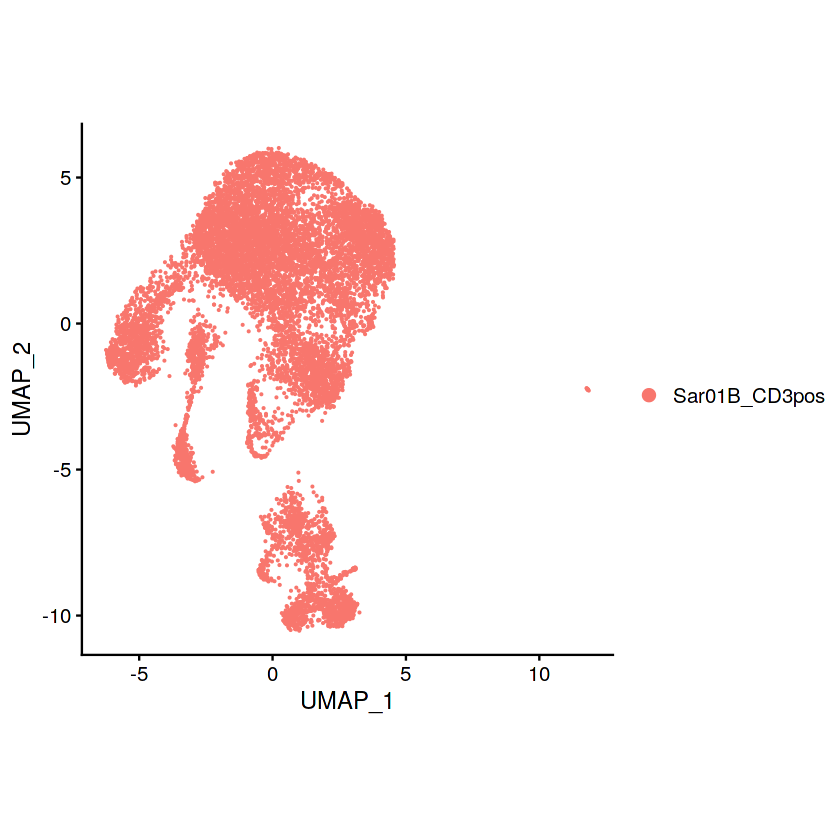

In [13]:
#DimPlot(object = seu,
#        reduction = 'tsne',label = F, 
#        pt.size = 0.1)+ theme(aspect.ratio=1)
DimPlot(object = seu,
        reduction = 'umap',label = F, 
        pt.size = 0.1)+ theme(aspect.ratio=1)

In [14]:
seu <- FindNeighbors(object = seu, dims = 1:30)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11054
Number of edges: 383238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9447
Number of communities: 6
Elapsed time: 2 seconds



   0    1    2    3    4    5 
6578 1511 1279 1013  660   13 

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

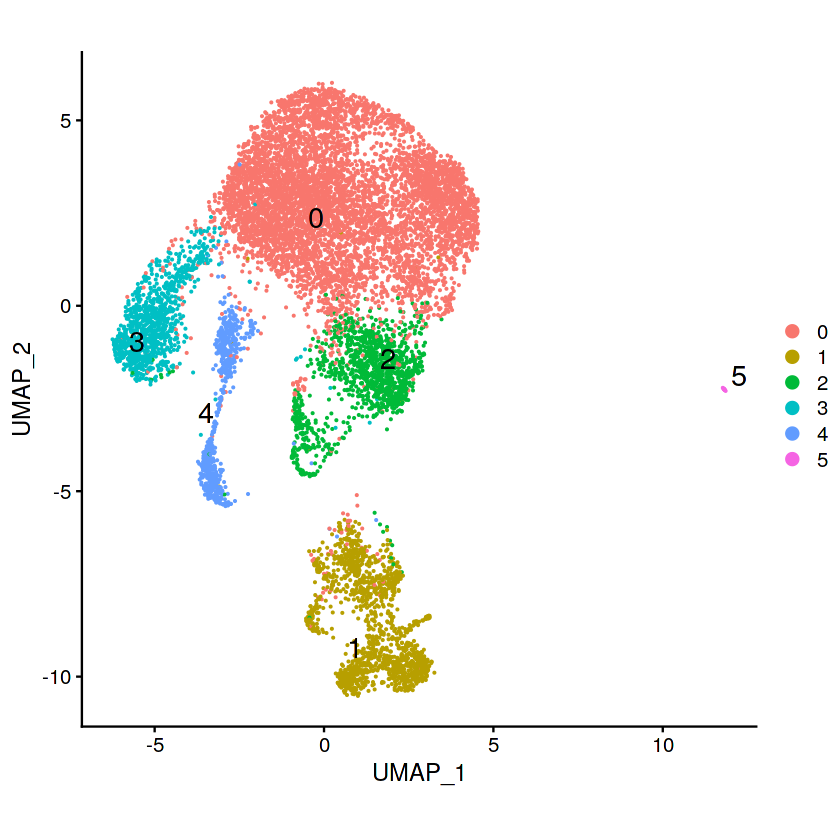

In [15]:
seu <- FindClusters(object = seu, resolution = 0.1)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11054
Number of edges: 383238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9130
Number of communities: 8
Elapsed time: 2 seconds



   0    1    2    3    4    5    6    7 
5079 1550 1394 1151 1023  660  184   13 

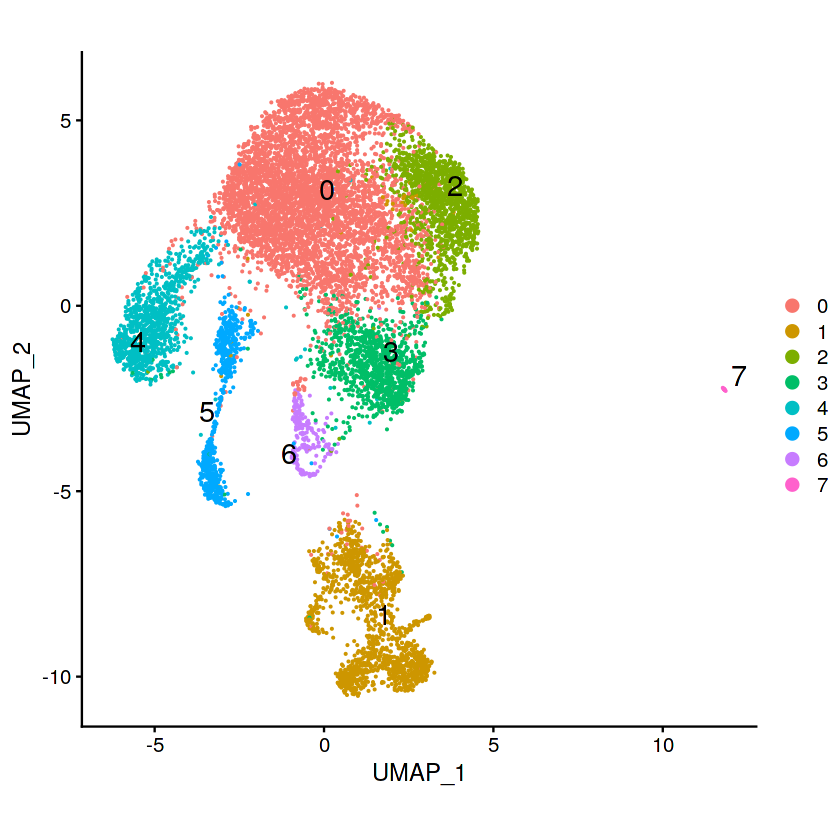

In [16]:
seu <- FindClusters(object = seu, resolution = 0.2)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11054
Number of edges: 383238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8923
Number of communities: 11
Elapsed time: 2 seconds



   0    1    2    3    4    5    6    7    8    9   10 
4554 1412 1127 1022  837  716  529  363  297  184   13 

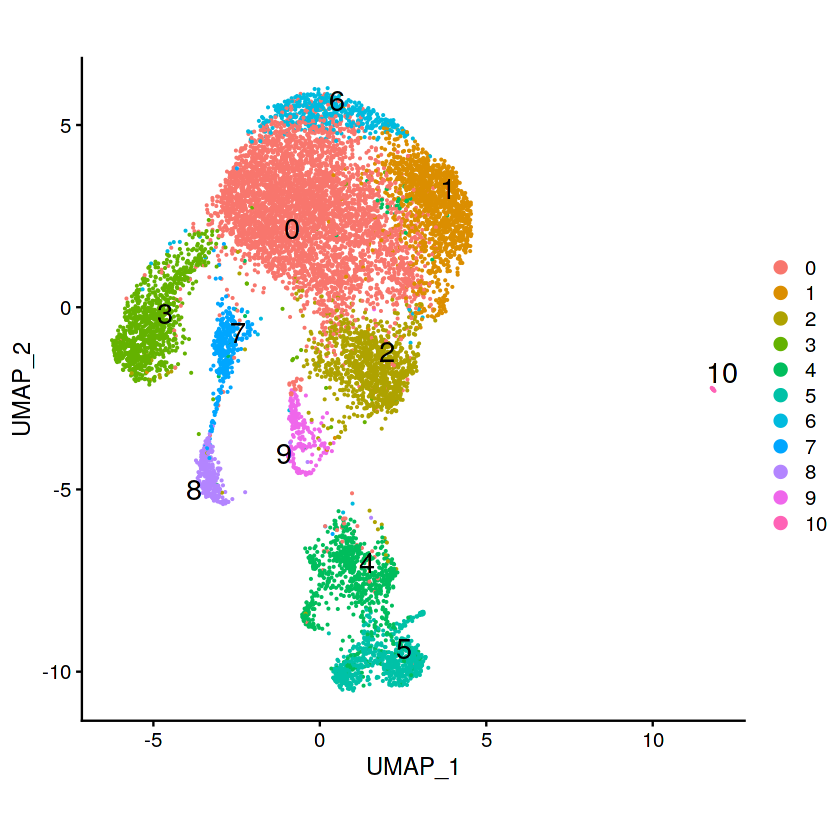

In [17]:
seu <- FindClusters(object = seu, resolution = 0.3)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11054
Number of edges: 383238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8753
Number of communities: 12
Elapsed time: 2 seconds



   0    1    2    3    4    5    6    7    8    9   10   11 
4487 1415 1161 1028  759  716  546  363  297  184   85   13 

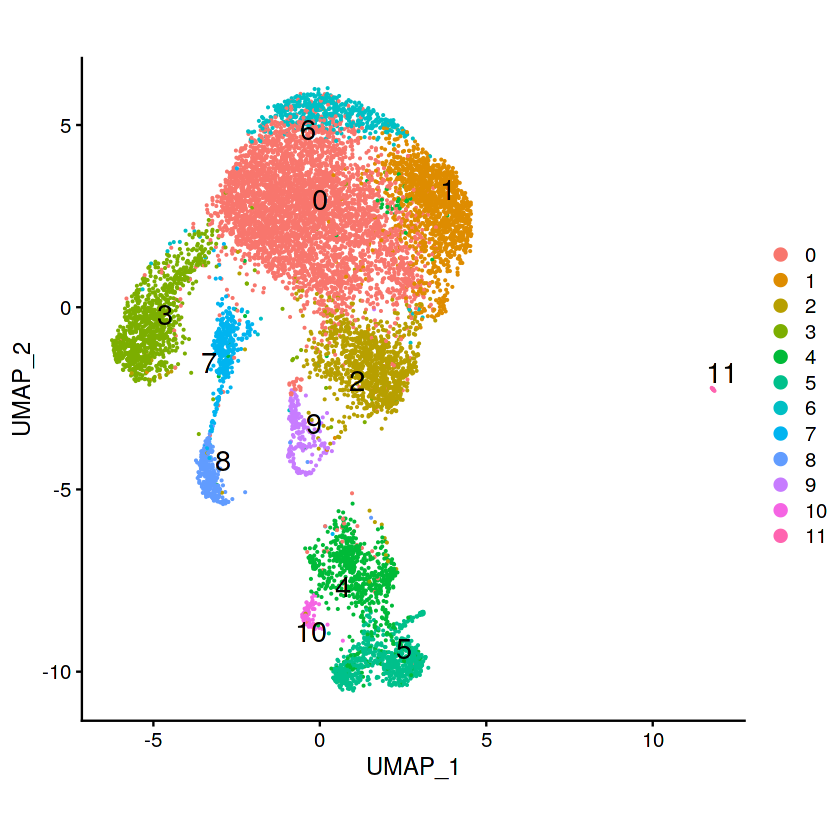

In [18]:
seu <- FindClusters(object = seu, resolution = 0.4)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11054
Number of edges: 383238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8424
Number of communities: 13
Elapsed time: 2 seconds



   0    1    2    3    4    5    6    7    8    9   10   11   12 
4231 1607 1152 1033  772  679  598  366  297  184   85   37   13 

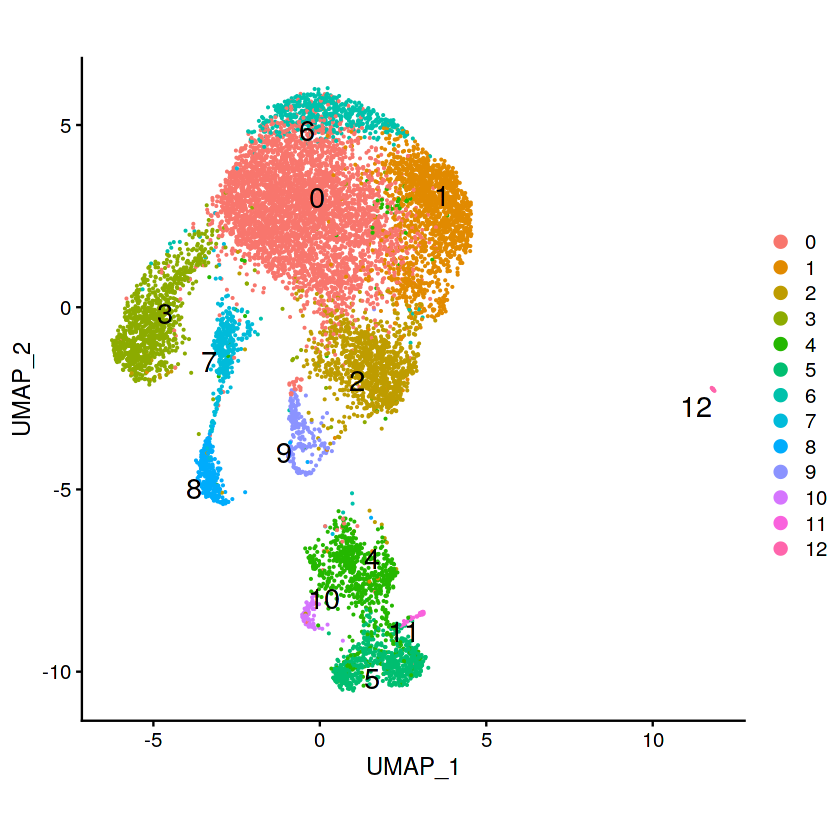

In [19]:
seu <- FindClusters(object = seu, resolution = 0.6)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

In [21]:
######################

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11054
Number of edges: 383238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9130
Number of communities: 8
Elapsed time: 2 seconds



   0    1    2    3    4    5    6    7 
5079 1550 1394 1151 1023  660  184   13 

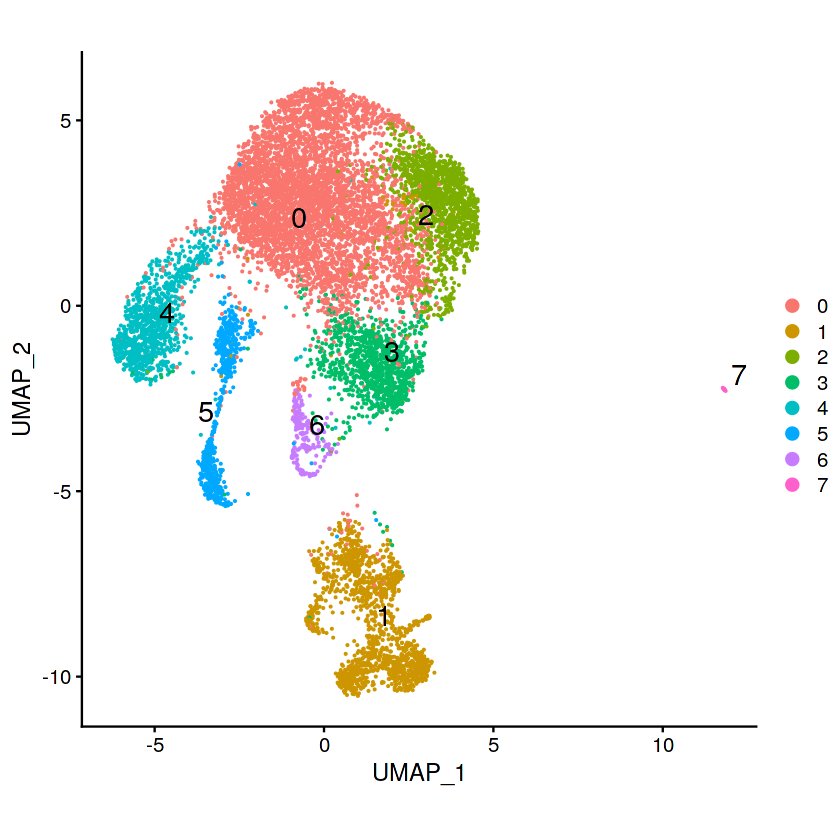

In [20]:
seu <- FindClusters(object = seu, resolution = 0.2)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

In [21]:
Idents(seu) <- seu@meta.data$seurat_clusters
ident_use = seu@meta.data$seurat_clusters

In [22]:
# nCells in total 
paste0(ncol(GetAssayData(object = seu, slot = "scale.data"))," cells in total")
# show percentage of nCells from each cluster 
cluster_nCell<-as.data.frame(table(ident_use))
colnames(cluster_nCell)<- c("cluster","nCells")
cluster_nCell$percent <-  round((cluster_nCell$nCells / sum(cluster_nCell$nCells)*100),2)
cluster_nCell

[1] "11054 cells in total"

cluster nCells percent
1 0       5079   45.95  
2 1       1550   14.02  
3 2       1394   12.61  
4 3       1151   10.41  
5 4       1023    9.25  
6 5        660    5.97  
7 6        184    1.66  
8 7         13    0.12

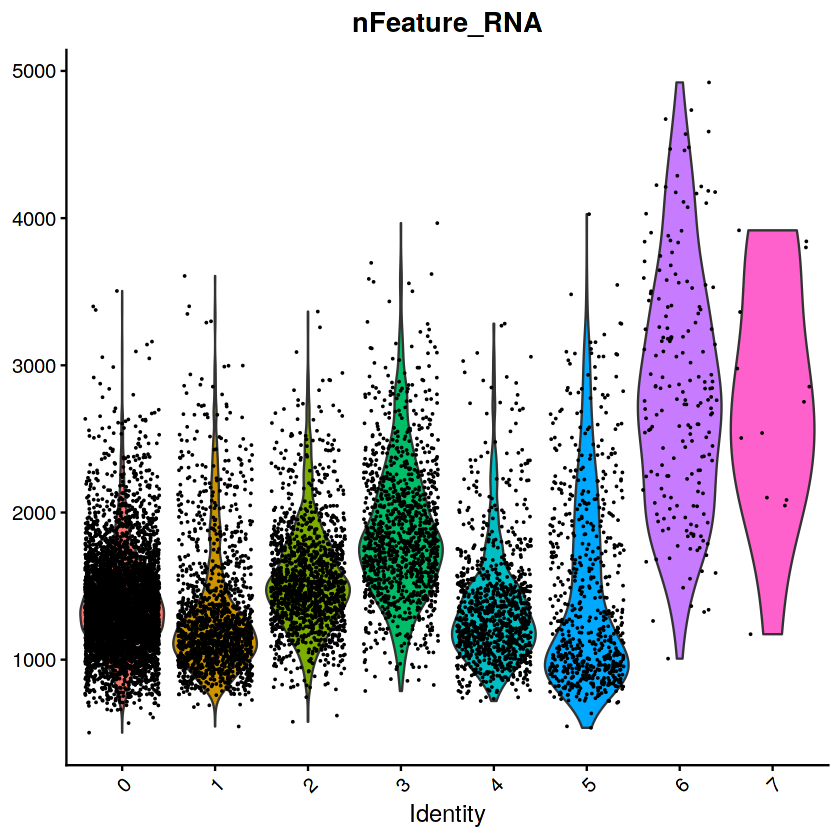

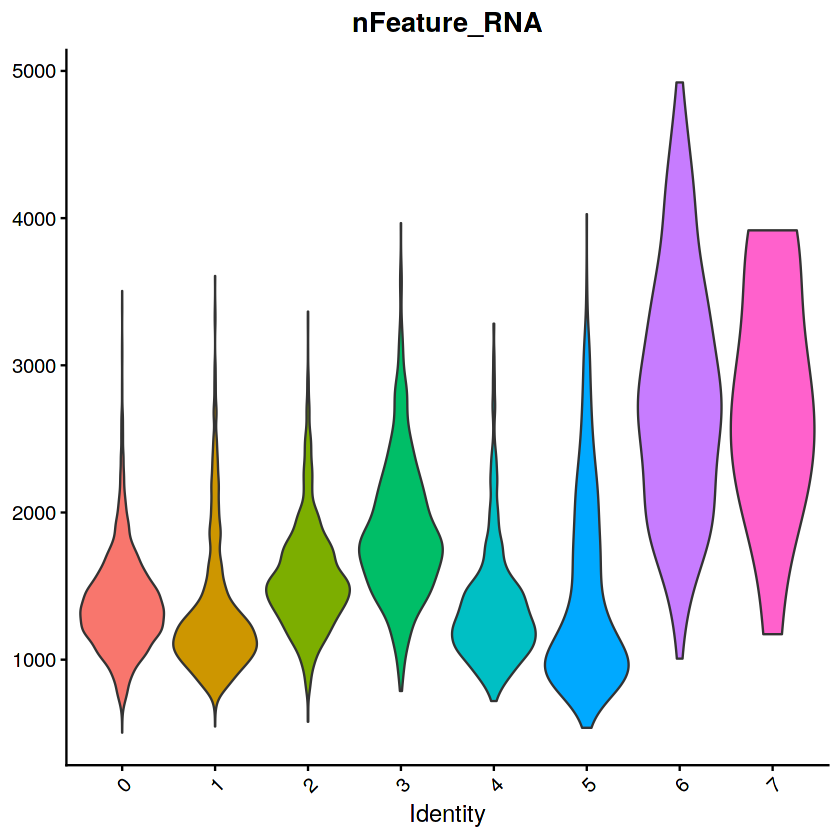

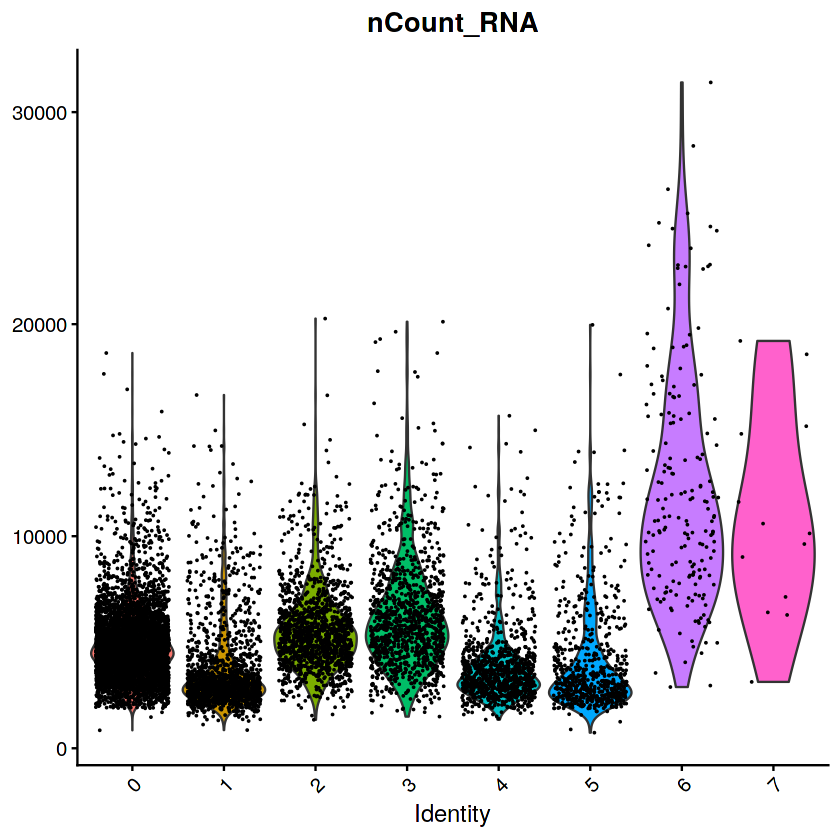

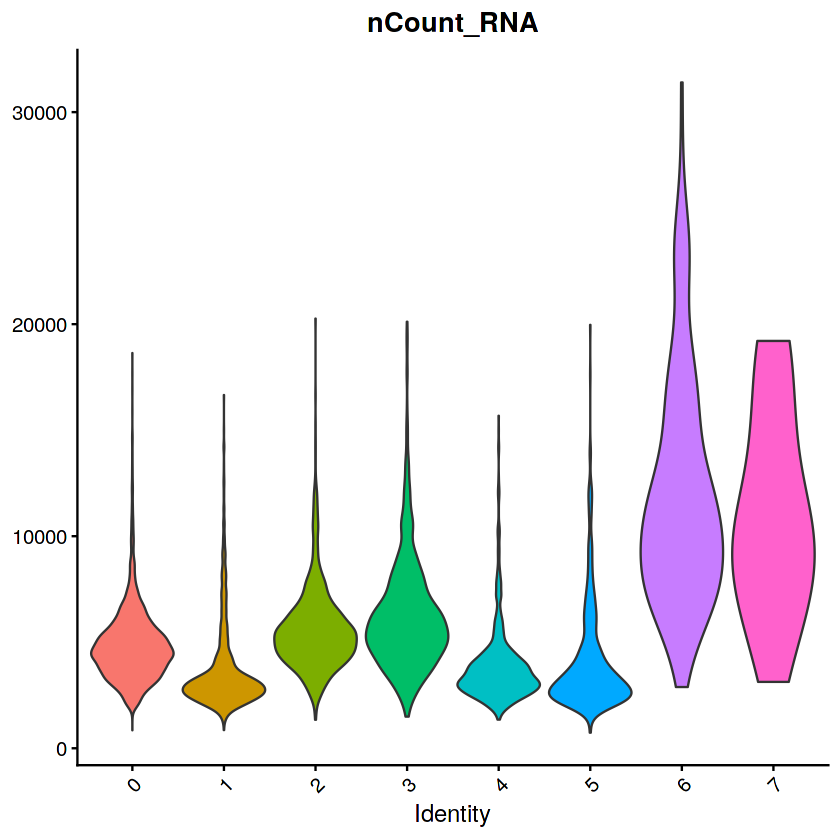

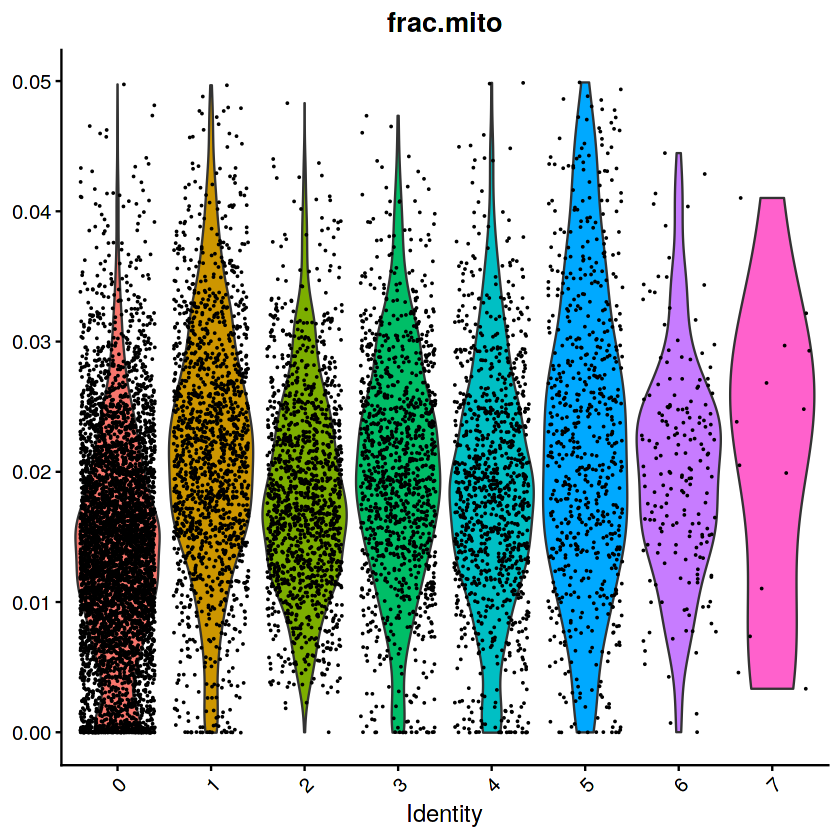

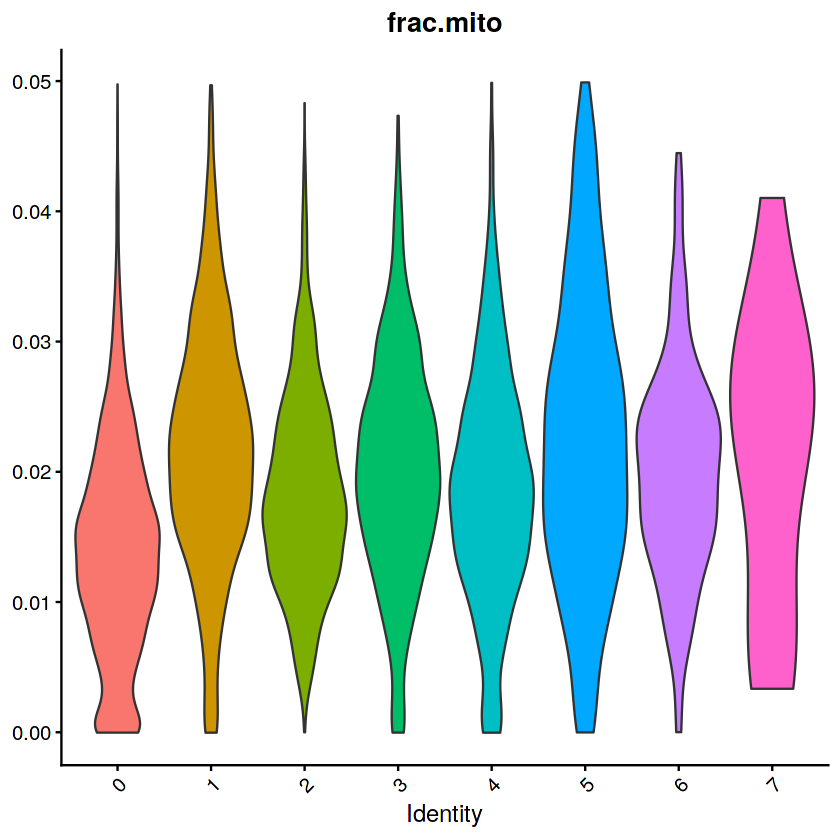

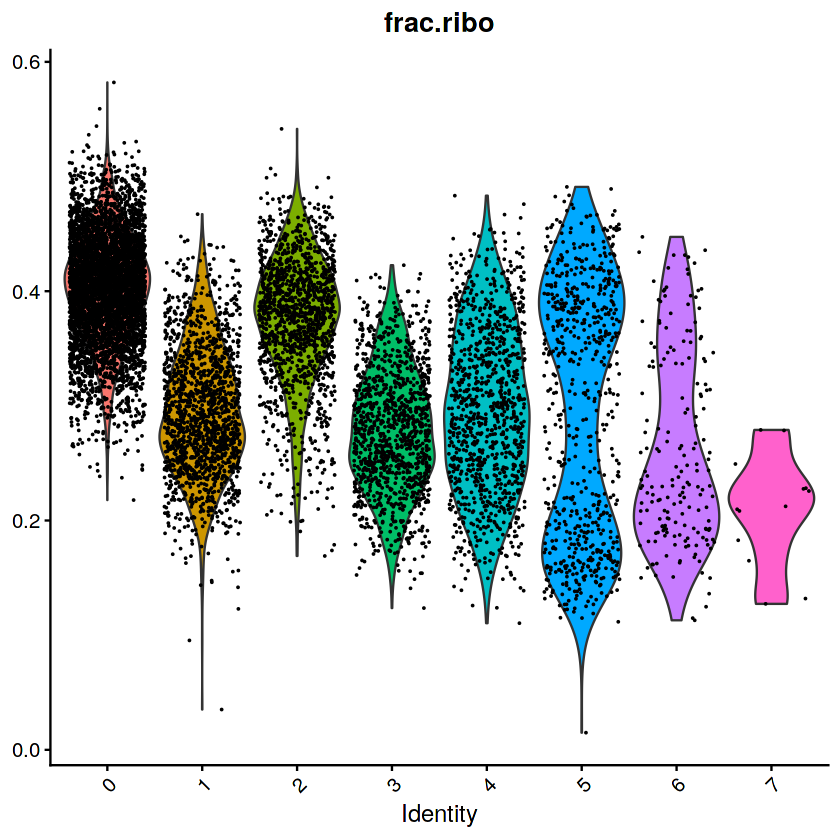

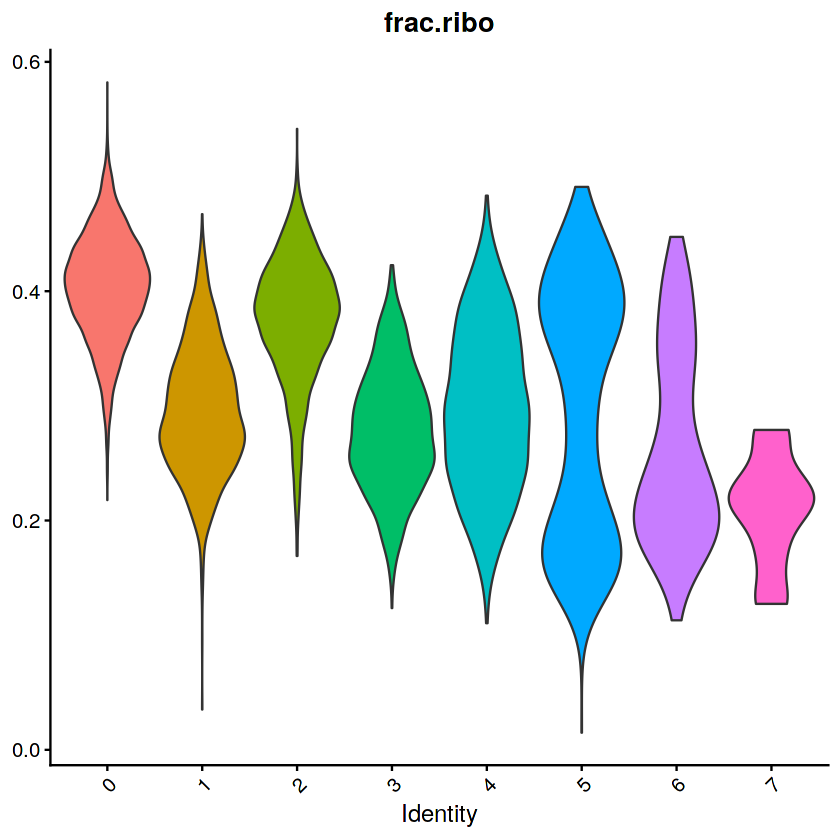

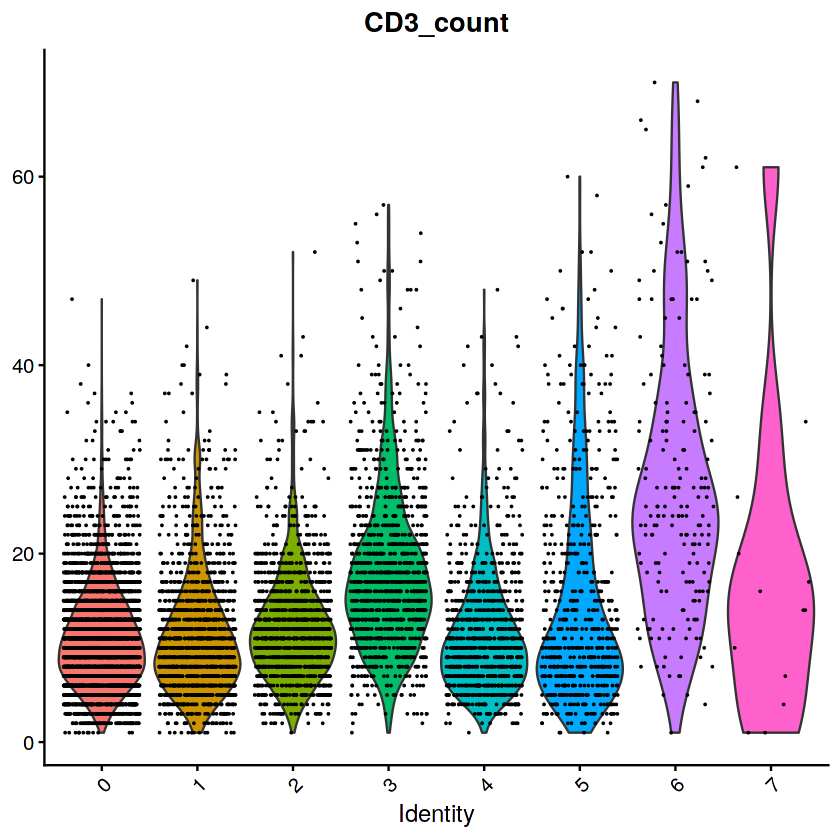

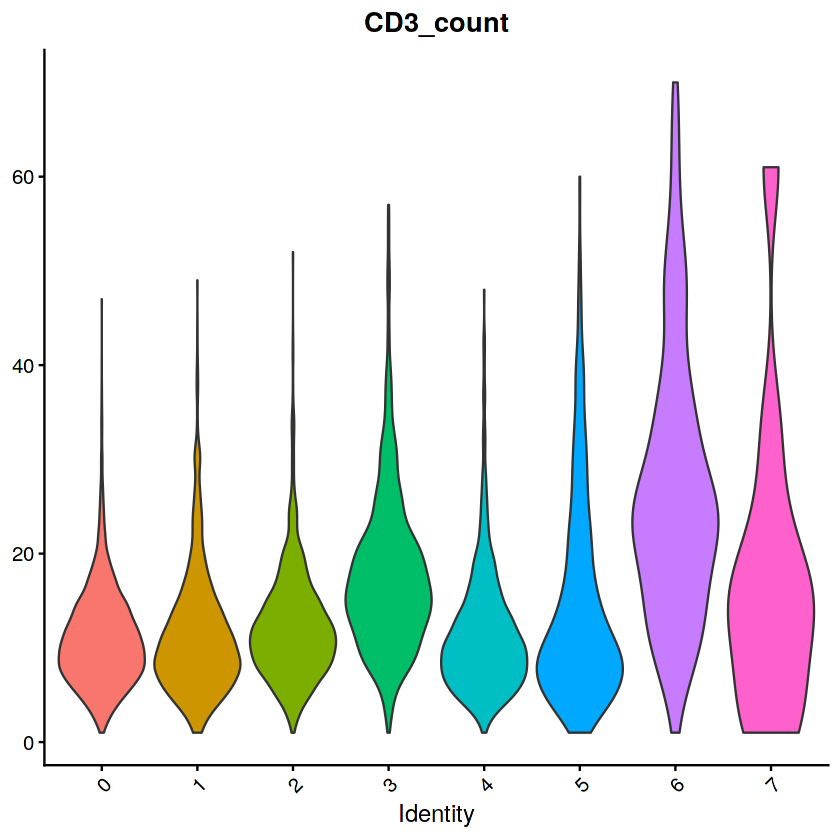

In [23]:
marker_qc<-c("nFeature_RNA","nCount_RNA","frac.mito","frac.ribo","CD3_count")
for (n in marker_qc){
    print(VlnPlot(object = seu, features = n,
                  #group.by = "sample",
                  x.lab.rot=T, 
                  #size.x.use = 5,
                  pt.size = 0.01
                       )+NoLegend()
    )
        print(VlnPlot(object = seu, features = n,
                  #group.by = "sample",
                  x.lab.rot=T, 
                  #size.x.use = 5,
                  pt.size = 0
                       )+NoLegend()
    )
    }

In [24]:
# find markers for every cluster compared to all remaining cells, report only the positive ones
seu.markers <- FindAllMarkers(object = seu, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.5)
#logfc.threshold=0.25 (default) instead of old version thresh.use=0.25
head(seu.markers)
dim(seu.markers)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7


p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster gene   
MAL      0.000000e+00 0.5291109 0.783 0.425  0.000000e+00 0       MAL    
SLC40A1 1.409514e-192 0.5911889 0.374 0.139 2.255363e-188 0       SLC40A1
FOS     5.625597e-133 0.5512863 0.437 0.233 9.001517e-129 0       FOS    
NKG7     0.000000e+00 3.5446182 0.928 0.050  0.000000e+00 1       NKG7   
CCL5     0.000000e+00 3.4775899 0.977 0.057  0.000000e+00 1       CCL5   
GNLY     0.000000e+00 2.9402329 0.516 0.012  0.000000e+00 1       GNLY

[1] 610   7

In [25]:
write.xlsx(seu.markers, file = paste0("Prefiltering_objects/",samples_ID,"_cluster_marker.xlsx"), 
           sheetName = "cluster_marker",col.names = TRUE, row.names = TRUE, append = FALSE)

In [26]:
top3 <- seu.markers %>% group_by(cluster) %>% top_n(3, avg_logFC)
top5 <- seu.markers %>% group_by(cluster) %>% top_n(5, avg_logFC)
top10 <- seu.markers %>% group_by(cluster) %>% top_n(10, avg_logFC)

In [27]:
top10

p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster gene       
1   0.000000e+00 0.5291109 0.783 0.425  0.000000e+00 0       MAL        
2  1.409514e-192 0.5911889 0.374 0.139 2.255363e-188 0       SLC40A1    
3  5.625597e-133 0.5512863 0.437 0.233 9.001517e-129 0       FOS        
4   0.000000e+00 3.5446182 0.928 0.050  0.000000e+00 1       NKG7       
5   0.000000e+00 3.4775899 0.977 0.057  0.000000e+00 1       CCL5       
6   0.000000e+00 2.9402329 0.516 0.012  0.000000e+00 1       GNLY       
7   0.000000e+00 2.4125060 0.650 0.007  0.000000e+00 1       GZMH       
8   0.000000e+00 2.1220026 0.921 0.220  0.000000e+00 1       CTSW       
9   0.000000e+00 2.0905269 0.941 0.207  0.000000e+00 1       CST7       
10  0.000000e+00 2.0044863 0.666 0.052  0.000000e+00 1       CD8B       
11  0.000000e+00 1.8659327 0.619 0.008  0.000000e+00 1       CCL4       
12  0.000000e+00 1.8056669 0.889 0.131  0.000000e+00 1       GZMA       
13  0.000000e+00 1.7645807 0.683 0.031  0.000000e+00 1       CD8A       
14  0.000000e+00 0.9736549 0.665 0.093  0.000000e+00 2       CTSH       
15  0.000000e+00 0.8357658 1.000 0.913  0.000000e+00 2       LTB        
16  0.000000e+00 0.6811209 0.499 0.092  0.000000e+00 2       CCR6       
17 9.322623e-308 0.7229083 0.528 0.127 1.491713e-303 2       TTC39C-AS1 
18 1.509750e-270 0.7221677 0.987 0.749 2.415752e-266 2       IL7R       
19 9.206208e-249 0.6899007 0.575 0.178 1.473085e-244 2       CISH       
20 2.779714e-248 0.7591359 0.662 0.249 4.447820e-244 2       USP10      
21 1.566404e-230 0.7678099 0.806 0.427 2.506404e-226 2       CMTM6      
22 7.685682e-213 0.6139107 0.549 0.184 1.229786e-208 2       BHLHE40    
23 1.363603e-179 0.6025134 0.618 0.250 2.181901e-175 2       TNFRSF4    
24 8.292467e-217 0.7499975 0.990 0.935 1.326878e-212 3       CRIP1      
25 1.264169e-200 0.7252280 0.758 0.338 2.022797e-196 3       LIMS1      
26 8.511040e-184 0.5993974 0.975 0.777 1.361852e-179 3       COTL1      
27 2.833622e-170 0.6323365 0.463 0.137 4.534079e-166 3       CXCR3      
28 1.450620e-158 0.7953377 0.827 0.541 2.321138e-154 3       ITGB1      
29 2.847921e-152 0.6461294 0.789 0.420 4.556959e-148 3       ITGA4      
30 3.377879e-150 0.5970829 0.901 0.585 5.404944e-146 3       ITM2A      
31 2.112545e-135 0.6189575 0.659 0.300 3.380284e-131 3       DUSP2      
32 1.256374e-130 0.5479080 0.647 0.300 2.010324e-126 3       NPDC1      
33 1.009019e-113 0.5395017 0.922 0.742 1.614532e-109 3       NOSIP      
34  0.000000e+00 1.2797250 0.519 0.015  0.000000e+00 4       FOXP3      
35  0.000000e+00 0.9268951 0.352 0.035  0.000000e+00 4       RTKN2      
36 1.043259e-199 0.8121130 0.471 0.130 1.669319e-195 4       CTLA4      
37 1.116849e-186 0.9303324 0.586 0.226 1.787070e-182 4       GBP5       
38 4.548883e-175 0.8072749 0.376 0.095 7.278668e-171 4       IL2RA      
39 1.480109e-171 0.7150061 0.381 0.099 2.368323e-167 4       STAM       
40 1.955348e-143 0.9082184 0.532 0.207 3.128752e-139 4       HLA-DRB1   
41 2.058299e-131 0.6941819 0.409 0.134 3.293484e-127 4       MIR4435-2HG
42 2.088677e-130 0.6831863 0.518 0.206 3.342092e-126 4       TIGIT      
43 1.086505e-107 0.6846883 0.532 0.277 1.738517e-103 4       SHMT2      
44  0.000000e+00 2.2016526 0.948 0.141  0.000000e+00 5       GZMK       
45  0.000000e+00 1.7025358 0.677 0.012  0.000000e+00 5       FXYD2      
46  0.000000e+00 1.3906669 0.847 0.289  0.000000e+00 5       NUCB2      
47 1.645123e-248 1.1444338 0.779 0.203 2.632361e-244 5       GZMA       
48 2.194269e-217 1.0978779 0.692 0.219 3.511050e-213 5       LYAR       
49 3.652374e-163 1.1333551 0.550 0.161 5.844163e-159 5       LGALS3     
50 2.004110e-117 0.9533902 0.683 0.376 3.206776e-113 5       FCMR       
51 9.630044e-116 1.0445729 0.832 0.637 1.540903e-111 5       MT2A       
52 2.077057e-106 0.9369071 0.759 0.549 3.323499e-102 5       CD27       
53  1.219922e-63 0.9289171 0.568 0.355  1.951997e-59 5       CLDND1     
54  0.000000e+00 1.6987264 0.728 0.004  0.000000e+00 6       

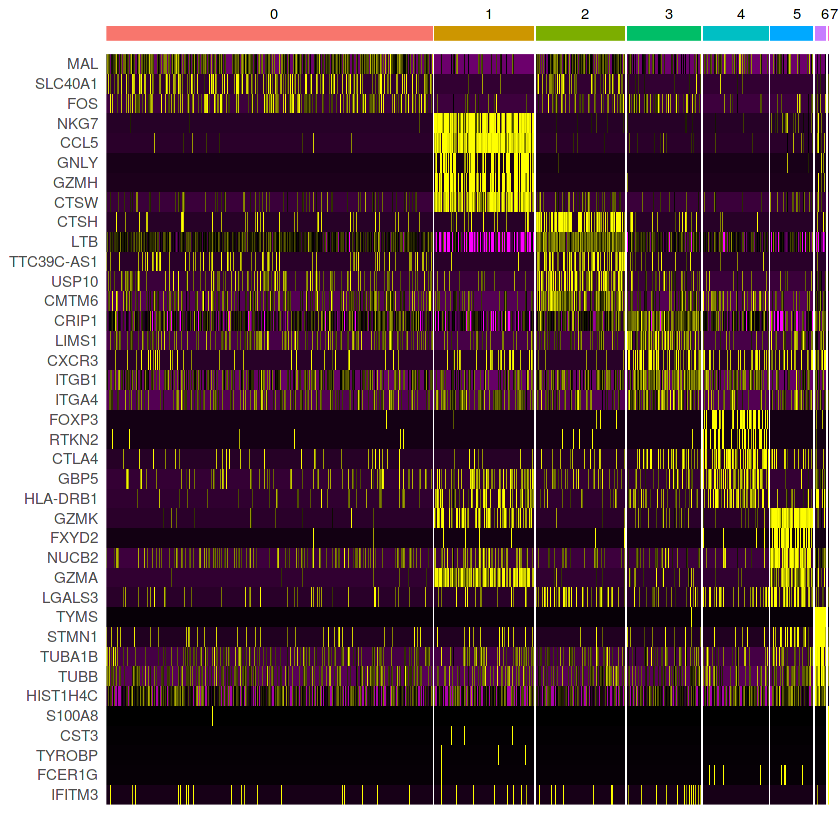

In [28]:
plt1<-DoHeatmap(object = seu, features = top5$gene,
         size = 3, angle=0)+NoLegend()
plt1

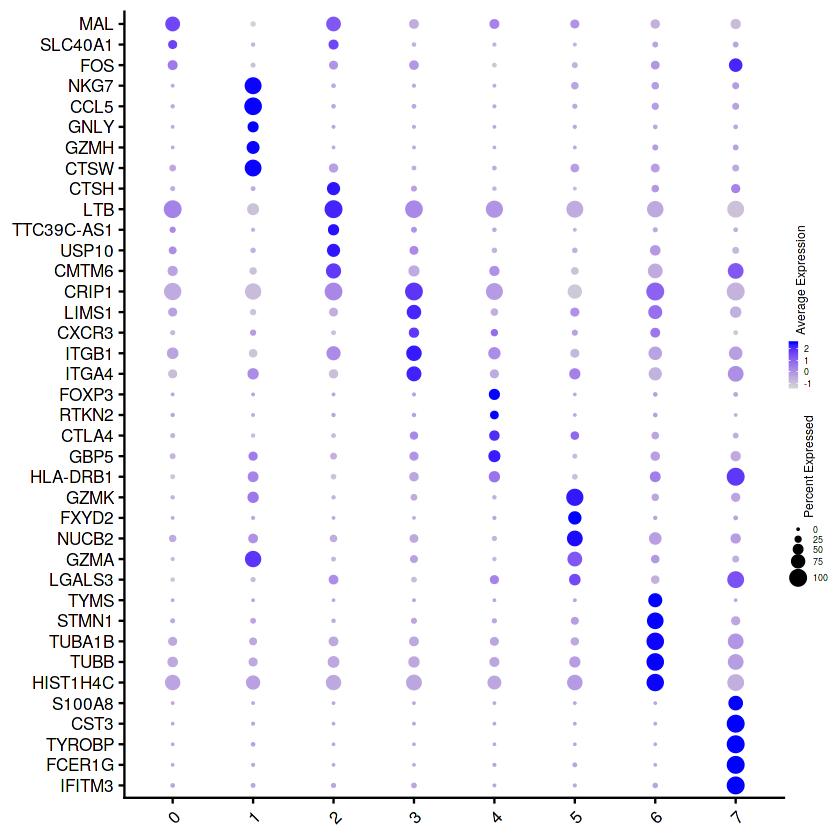

In [29]:
plt1<-DotPlot(seu, features = unique(top5$gene),
              dot.scale = 4
              #scale.by = "size"
             ) + coord_flip()+
theme(#strip.background = element_blank(),
    axis.title = element_blank(),
    axis.text.x = element_text(size = 10,angle = 45,hjust = 1),
    axis.text.y = element_text(size = 10),
     legend.position = "right",
     #legend.spacing = unit(0, "mm"),
     legend.direction = "vertical",
        legend.text = element_text(size=5),
        legend.key.width = unit(2, "mm"),
        legend.key.height = unit(2, "mm"),
        legend.box.spacing = unit(1, "mm"),
        legend.margin = margin(2),
        legend.title = element_text(size = 7,angle = 90)
)
plt1

In [30]:
# Search for known marker genes in seu
leukos <- c("PTPRC") 
Tcells <- c("CD3G","CD3D","CD3E")
CD4<-c("CD4")
CD8 <- c("CD8A", "PRF1", "GZMB")
Memory<-c("CCR7","SELL","KLF2","CD69","S1PR1")
NK <- c("KLRC1")
Th1 <- c("TBX21", "IFNG", "LTA") 
Th2 <- c("GATA3", "IL4", "IL5", "IL13") 
Th17 <- c("RORC","IL17A","IL17F", "IL23R","CCR6") 
Tregs <- c("FOXP3", "IL2RA", "CTLA4")
Tr1<-c("IL10","ITGA2","LAG3","HAVCR2")#,"Ahr","Irf4","Prdm1","Maf")
Tgd<- c("TRDC","TCRG")
Prolif<-c("STMN1","MKI67")
#Tgd_Scart<-c("SCART2")
#T_APC<-c("C1QA","C1QB")
#others<-c("ZCCHC12","KLRC3","VCAM1")

known_markers<-list(
leukos,
Tcells,
CD4,
CD8,
Memory,
NK,
Th1,
Th2,
Th17,
Tregs,
Tr1,
Tgd,
Prolif
#Tgd_Scart,
#T_APC,
#others   
)
known_markers

marker_gene_list<-known_markers
length(unlist(marker_gene_list))
marker_gene_list_expressed <- intersect(unlist(marker_gene_list), rownames(GetAssayData(seu)))
length(marker_gene_list_expressed)
setdiff(unlist(marker_gene_list),marker_gene_list_expressed)

[[1]]
[1] "PTPRC"

[[2]]
[1] "CD3G" "CD3D" "CD3E"

[[3]]
[1] "CD4"

[[4]]
[1] "CD8A" "PRF1" "GZMB"

[[5]]
[1] "CCR7"  "SELL"  "KLF2"  "CD69"  "S1PR1"

[[6]]
[1] "KLRC1"

[[7]]
[1] "TBX21" "IFNG"  "LTA"  

[[8]]
[1] "GATA3" "IL4"   "IL5"   "IL13" 

[[9]]
[1] "RORC"  "IL17A" "IL17F" "IL23R" "CCR6" 

[[10]]
[1] "FOXP3" "IL2RA" "CTLA4"

[[11]]
[1] "IL10"   "ITGA2"  "LAG3"   "HAVCR2"

[[12]]
[1] "TRDC" "TCRG"

[[13]]
[1] "STMN1" "MKI67"

[1] 37

[1] 32

[1] "IL5"   "IL13"  "IL17A" "IL17F" "TCRG"

In [31]:
genes_to_plot<- marker_gene_list_expressed
length(genes_to_plot)

[1] 32

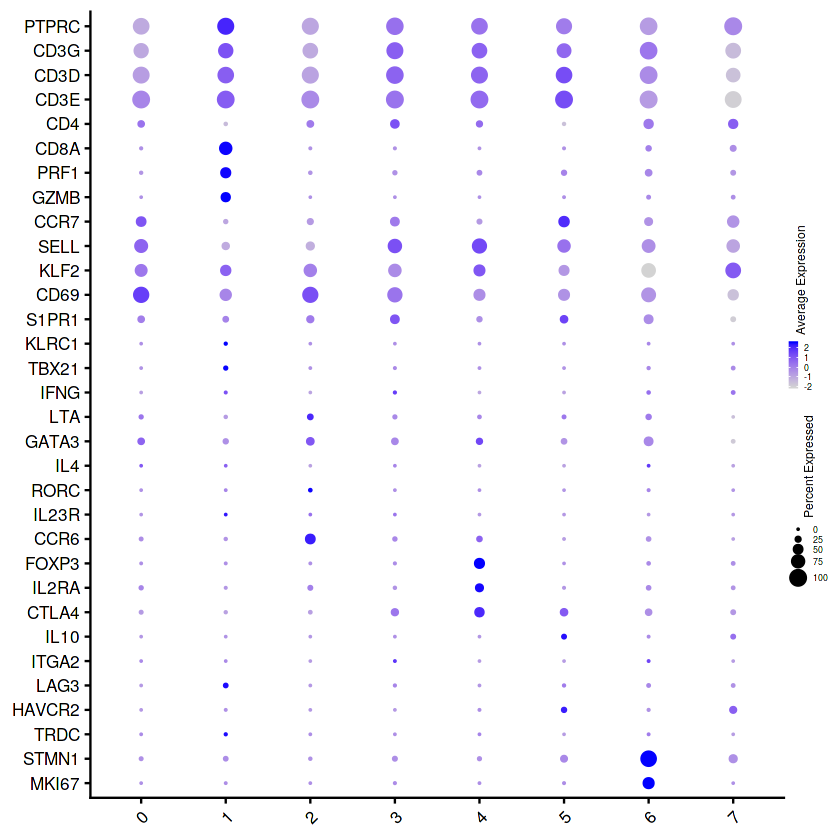

In [32]:
plt1<-DotPlot(seu, features = genes_to_plot,
              dot.scale = 4
              #scale.by = "size"
             ) + coord_flip()+
theme(#strip.background = element_blank(),
    axis.title = element_blank(),
    axis.text.x = element_text(size = 10,angle = 45,hjust = 1),
    axis.text.y = element_text(size = 10),
     legend.position = "right",
     #legend.spacing = unit(0, "mm"),
     legend.direction = "vertical",
        legend.text = element_text(size=5),
        legend.key.width = unit(2, "mm"),
        legend.key.height = unit(2, "mm"),
        legend.box.spacing = unit(1, "mm"),
        legend.margin = margin(2),
        legend.title = element_text(size = 7,angle = 90)
)
plt1


In [ ]:
####################tbc!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [34]:
#saveRDS(seu, paste0("Prefiltering_objects/",samples_ID,"_clustering_part1.rds"))